In [10]:
import random
import math
import numpy as np
import scipy.stats as stats
import statistics
from scipy.stats import wrapcauchy
import matplotlib.pyplot as plt
plt.style.use('ggplot')




In [3]:
def rw2(n):# save the headings not the pairs
    #x,y=0,0
    x=np.zeros(n)
    y=np.zeros(n)
    theta=[0]*n
    theta[0]=wrapcauchy.rvs(c,loc=0,size=1)
    if theta[0]>2*math.pi:
            theta[0] = theta[0] - 2* math.pi
    if theta[0]<0:
            theta[0] = theta[0] + 2* math.pi
    for i in range(1,n):
        r=random.weibullvariate(alpha,beta)
        theta[i]=wrapcauchy.rvs(c,loc=theta[i-1],size=1)# c is the shape parameter
        if theta[i]>2*math.pi:
            theta[i] =theta[i] - 2* math.pi
        if theta[i]<0:
            theta[i] = theta[i] + 2* math.pi
        x[i]=x[i-1]+r*math.cos(theta[i])
        y[i]=y[i-1]+r*math.sin(theta[i])
        #x+=r*math.cos(theta[i])
        #y+=r*math.sin(theta[i])
    return theta 
n=100 #int(input("how many steps?"))
alpha=2 #int(input("what's the scale?"))
beta=5 #int(input("what's the shape?"))
c=0.9# float(input("What's the shape parameter for the wrapped Cauchy?"))# this needs to be between 0 and 1
#tries=int(input("how many tries?"))
#for i in range(tries):
    #print(rw2(n))
data=rw2(n)
#data

In [4]:
# modify the data so I can have the differences
#data[1]=data[1]-data[0] etc.
new_data=np.zeros(n)
new_data[0]=data[0]
for i in range(len(data)-1):
    new_data[i+1]=abs(data[i+1]-data[i])# I can only put positive values
#new_data    

In [5]:
# calculate the log likelihood of wrapcauchy
def log_wclikelihood(x,a,b):
     return sum(wrapcauchy.logpdf(x,c=a,loc=b))# c is the shape parameter
    

In [6]:
#n=100 #number of observations in a sample 
# initial guess for theta(a) as array,these are shape(c) 
guess = 0.9
# Prepare storing MCMC chain as array of arrays.
A = [guess]
# define stepsize of MCMC.
stepsize = 0.035  # array of stepsizes
accepted  = 0.0
old_theta=guess# define initial values for theta 
old_loglik = log_wclikelihood(new_data,old_theta,0)#calculate the first log likelihood
# Metropolis-Hastings with 10,000 iterations.
for p in range(10000):
    #old_theta  = A[len(A)-1]   old parameter value as array(not that elegant way)
    # Suggest new candidate from Gaussian proposal distribution.
    #new_theta = np.zeros([len(old_theta)])
    new_theta = old_theta + stats.norm(0, stepsize).rvs() 
    #add the restraints on new_theta
    if new_theta<0 or new_theta>1: 
        continue
    new_loglik = log_wclikelihood(new_data,new_theta,0)
    # Accept new candidate in Monte-Carlo fashing.
    if (new_loglik > old_loglik):
        A.append(new_theta)
        accepted = accepted + 1.0  # monitor acceptance
        old_loglik=new_loglik
        old_theta=new_theta
    else:
        u = random.uniform(0.0,1.0)
        if (u < math.exp(new_loglik - old_loglik)):
            A.append(new_theta)
            accepted = accepted + 1.0  # monitor acceptance
            old_loglik=new_loglik
            old_theta=new_theta
        else:
            A.append(old_theta)
print("Acceptance rate = "+str(accepted/10000.0))
#print(A)


Acceptance rate = 0.4109


In [7]:
# save the posterior for a
statistics.mean(A)   


0.90097760921175285

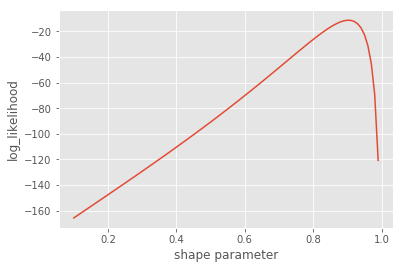

In [11]:
# plots now
from random import randint

loglike = np.zeros(100)
xval = np.zeros(100)

for i in range(100):
    xval[i]=0.1+i*0.01
    loglike[i] = log_wclikelihood(new_data,xval[i],0)
    

plt.plot(xval,loglike)
plt.ylabel("log_likelihood")
plt.xlabel("shape parameter")
plt.show()


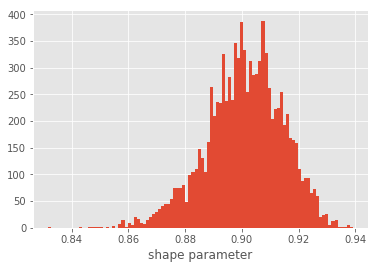

In [12]:
plt.hist(A,bins=100)
plt.xlabel("shape parameter")
plt.show()
